<a href="https://colab.research.google.com/github/EAsencios/DEEP-LEARING/blob/master/keras_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from tensorflow.keras import Input, Sequential, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Load and Prepocess MNIST Data

In [10]:
num_classes = 10
input_shape = [28,28,1]

# Load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Build Model

In [11]:
# Sequencial Model in 1 List
model = Sequential(
    [
     Input(shape=input_shape),
     Conv2D(32, kernel_size=(3,3), activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Conv2D(32, kernel_size=(4,4), activation='relu'),
     MaxPooling2D(pool_size=(3,3)),
     Flatten(),
     Dense(10, 'softmax')
    ]
)

In [12]:
# Using model.add

add_model = Sequential()
add_model.add(Input(shape=input_shape))
add_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
add_model.add(MaxPooling2D(pool_size=(2,2)))
add_model.add(Conv2D(332, kernel_size=(4,4), activation='relu'))
add_model.add(MaxPooling2D(pool_size=(3,3)))
add_model.add(Flatten())
add_model.add(Dense(10, activation='softmax'))

## Show Model

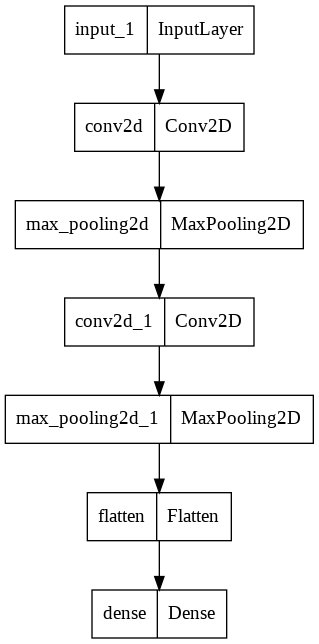

In [14]:
plot_model(model)

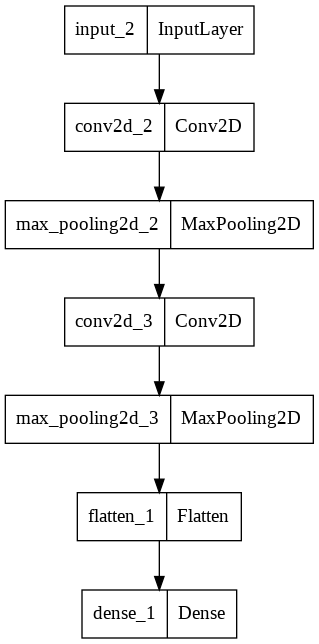

In [7]:
plot_model(add_model)

In [14]:
input = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3,3), activation='relu')(input)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(32, kernel_size=(4,4), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input, outputs=x)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 32)        16416     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0   

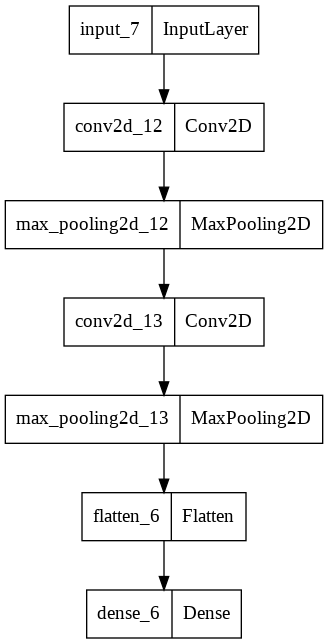

In [15]:
model.summary()
plot_model(model)

In [ ]:
batch_size = 32
epochs = 15

my_optimizer = Adam(learning_rate=.01)
model compile(loss='categorical_crossentropy', optimize=my_optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1)